In [151]:
import numpy as np
import scipy as sp
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('conditional_gan/')

import datetime

In [2]:
import torch.utils.data
import os.path
import random
import torchvision.transforms as transforms
import numpy as np
from numpy import inf

from skimage.transform import resize
from matplotlib.pyplot import figure


In [3]:
test_data_input = dict(np.load('datasets/livneh/testA.npz'))
test_data_ouput = dict(np.load('datasets/livneh/testB.npz'))

In [160]:
starting_day = datetime.date(1900, 1, 1) + datetime.timedelta(days = 37620 + 4018 - 804)

In [161]:
starting_day

datetime.date(2011, 10, 20)

In [4]:
model_path = "conditional_gan/SavedModels/cGanResNoMask"

In [5]:
test_data_input.keys()

['variables', 'data', 'metadata']

In [6]:
test_data_input['data'].shape

(804, 321, 321, 4)

In [7]:
test_data_ouput['data'].shape

(804, 321, 321, 1)

In [8]:
data_A = test_data_input['data']
data_B = test_data_ouput['data']

In [9]:
def take_two_weeks(input_data, start_date):
    return input_data[start_date:start_date + 14, :, :, :]

In [10]:
take_two_weeks(test_data_ouput['data'], 10).shape

(14, 321, 321, 1)

In [11]:
from networks import define_G

In [12]:
model = define_G(3, 1, 32, 'instance', 'resnet', False, [0])
model

ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm()
    (3): ReLU(inplace)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): InstanceNorm()
    (6): ReLU(inplace)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm()
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (2): ReLU(inplace)
        (3): ReflectionPad2d((1, 1, 1, 1))
        (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (5): InstanceNorm()
      )
      (relu): ReLU(inplace)
    )
    (11): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (2): ReLU(inplace)
        (3): 

In [13]:
model.load_state_dict(torch.load(model_path)['netG_A_B'])
model.eval()

ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm()
    (3): ReLU(inplace)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): InstanceNorm()
    (6): ReLU(inplace)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm()
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (2): ReLU(inplace)
        (3): ReflectionPad2d((1, 1, 1, 1))
        (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (5): InstanceNorm()
      )
      (relu): ReLU(inplace)
    )
    (11): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        (2): ReLU(inplace)
        (3): 

In [14]:
torch.histc(torch.from_numpy(test_data_ouput['data'][1,:,:,:]))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [15]:
figure(num=None, figsize=(1, 1), dpi=80, facecolor='w', edgecolor='k')

<Figure size 80x80 with 0 Axes>

<Figure size 80x80 with 0 Axes>

In [16]:
#normalizing data
def arr_to_input(arr):
    arr = np.nan_to_num(arr)
    if arr.ndim == 3:
        arr = np.expand_dims(arr, axis=2)
    means = np.nanmean(arr, axis=(0,1,2))
    # scale and shift to [-1,1]
    arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
    arr[np.isnan(arr)] = -1; arr[arr == inf] = -1; arr[arr == -inf] = -1
    if 64 is not None:
        new_arr = []
        #print "Resizing data to %d" % 64
        for x in arr:
            new_arr.append(resize(x, (64,64)))
        arr = np.stack(new_arr)
    # convert data from b,0,1,c to b,c,0,1
    arr = np.transpose(arr, (0,3,1,2))
    
    return arr.astype('float32')

In [17]:
def hist_kl_div(tenA, tenB, numbins):
    min_elem = min(torch.min(tenA).item(), torch.min(tenB).item())
    max_elem = max(torch.max(tenA).item(), torch.max(tenB).item())
    #print(min_elem, max_elem)
    histA = torch.histc(tenA.cpu(), numbins, min_elem, max_elem)
    histB = torch.histc(tenB.cpu(), numbins, min_elem, max_elem)
    eps = 1e-4
    histA = (histA+eps)*1.0/torch.sum(histA)
    histB = (histB+eps)*1.0/torch.sum(histB)
    return torch.sum(histA * (torch.log(histA) - torch.log(histB)))

In [187]:
def plot_hist_diffs(start_date, inputA, inputB, nan_mask):
    fake_B = model(torch.from_numpy(arr_to_input(take_two_weeks(inputA, start_date))[:,0:3,:,:]).cuda()).cpu()
    real_B = torch.from_numpy(arr_to_input(take_two_weeks(inputB, start_date)))
    curr_day = 0
    #print(real_B.shape)
    mask = np.ravel(np.tile(nan_mask, (real_B.shape[0], 1, 1, 1)))
    #for images in zip(real_B, fake_B):
    real_im = np.ravel(real_B.detach().numpy())*mask
    fake_im = np.ravel(fake_B.detach().numpy())*mask
    
    real_im = real_im[~np.isnan(real_im)]
    fake_im = fake_im[~np.isnan(fake_im)]
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.hist(real_im - fake_im, 1000, None, ec='blue',  histtype='step', label='diffs')
    ax.legend(loc='upper left')
    title = "Histogram of data binned from " + str(starting_day + datetime.timedelta(days = start_date)) + " to " + str(starting_day + datetime.timedelta(days = start_date + 14))
    ax.set_title(title)

In [188]:
def plot_histograms(start_date, inputA, inputB, nan_mask):
    fake_B = model(torch.from_numpy(arr_to_input(take_two_weeks(inputA, start_date))[:,0:3,:,:]).cuda()).cpu()
    real_B = torch.from_numpy(arr_to_input(take_two_weeks(inputB, start_date)))
    curr_day = 0
    #print(real_B.shape)
    mask = np.ravel(np.tile(nan_mask, (real_B.shape[0], 1, 1, 1)))
    #for images in zip(real_B, fake_B):
    real_im = np.ravel(real_B.detach().numpy())*mask
    fake_im = np.ravel(fake_B.detach().numpy())*mask
    
    real_im = real_im[~np.isnan(real_im)]
    fake_im = fake_im[~np.isnan(fake_im)]
    
    
    
    
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.hist(real_im, 1000, None, ec='blue',  histtype='step', label='Real Data')
    ax.hist(fake_im, 1000, None, ec='green',  histtype='step', label='Generated Data')
    ax.legend(loc='upper left')
    title = "Histogram of data binned from " + str(starting_day + datetime.timedelta(days = start_date)) + " to " + str(starting_day + datetime.timedelta(days = start_date + 14))
    ax.set_title(title)
            
#     fig, ax = plt.subplots(nrows=14, ncols=1, figsize=(15, 45))
#     divergences = []
#     for row in ax:
#         colors = ['blue', 'lime']
#         real_im = np.ravel(real_B[curr_day, :,:,:].detach().numpy())
#         fake_im = np.ravel(fake_B[curr_day, :,:,:].detach().numpy())
#         common_params = dict(bins=100, range=(min(np.min(real_im), np.min(fake_im)), max(np.max(real_im), np.max(fake_im))), normed=True, color = colors, label = ['real', 'fake'])
#         #col.title = 'Histograms of Real vs Fake data on day ' + str(start_date + curr_day)
#         row.hist((real_im, fake_im), **common_params)
#         row.legend(prop={'size': 10})

        
#         divergences.append(hist_kl_div(real_B[curr_day, :,:,:].detach(), fake_B[curr_day, :,:,:].detach(), 100))
#         curr_day +=1
    #return divergences

In [189]:
mask = np.load("OceanMask.npy")
mask = resize(mask.astype(np.float), (64,64))
mask[mask == 1] = np.nan
mask = mask + 1

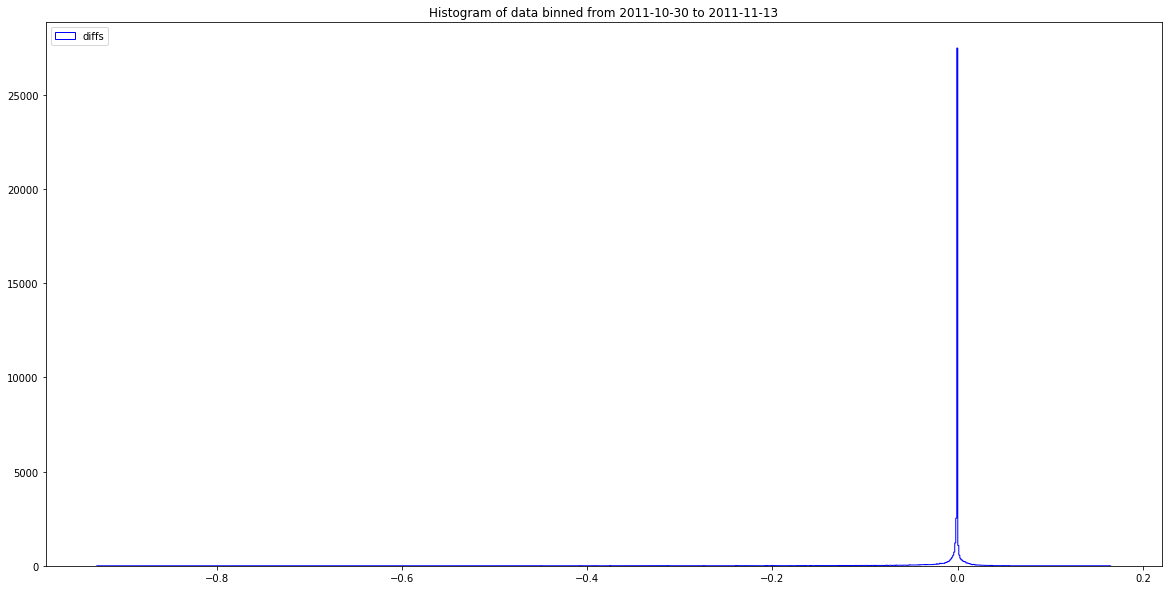

In [190]:
plot_hist_diffs(10, data_A, data_B, mask)

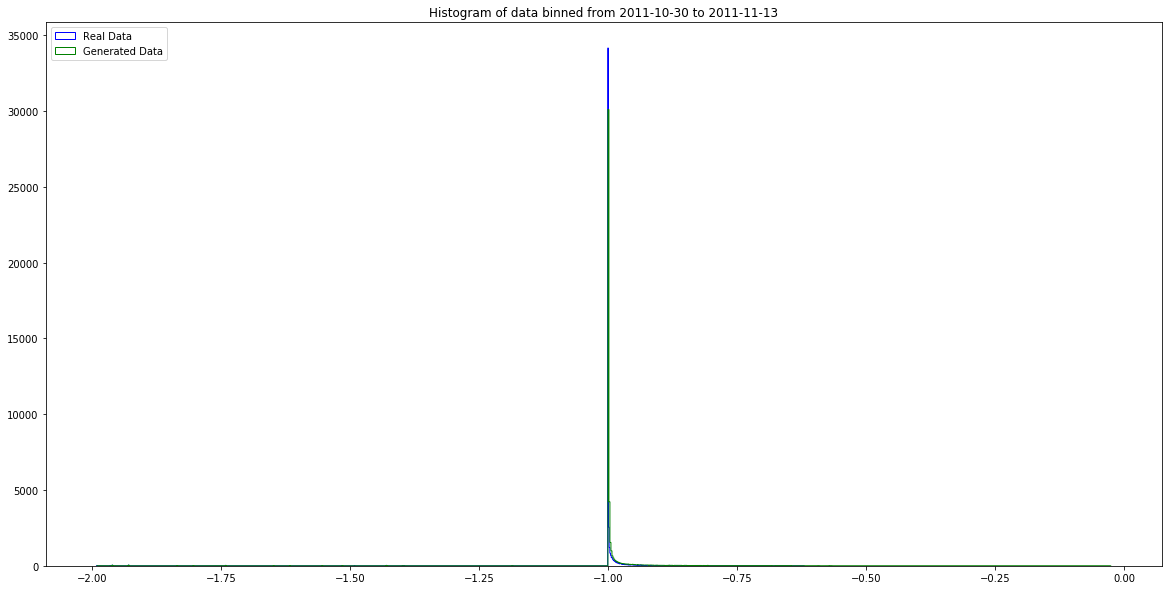

In [191]:
plot_histograms(10, data_A, data_B, mask)

In [131]:
def pearson_coeff(start_date, inputA, inputB):
    fakeB = model(torch.from_numpy(arr_to_input(take_two_weeks(inputA, start_date))[:,0:3,:,:]).cuda()).detach().cpu().numpy()
    realB = torch.from_numpy(arr_to_input(take_two_weeks(inputB, start_date))).numpy()
    
    xbar = np.mean(fakeB, axis=0)
    ybar = np.mean(realB, axis=0)
    xSTDev = np.std(fakeB, axis=0)
    ySTDev = np.std(realB, axis=0)
    r = np.mean(((fakeB - xbar)/(xSTDev)) * ((realB - ybar)/(ySTDev)), axis = 0)
    return r
    

/home/ashray/anaconda3/envs/torch27/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/home/ashray/anaconda3/envs/torch27/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


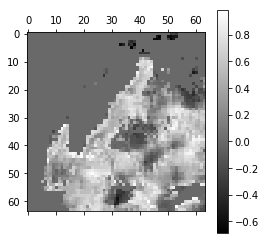

In [197]:
ax = plt.matshow(np.nan_to_num(pearson_coeff(10, data_A, data_B))[0,:,:], cmap = 'gray')
plt.colorbar(ax)
